In [1]:
import quandl
quandl.ApiConfig.api_key = ''

In [2]:
import pickle

read_pickle = 0

if read_pickle == 0:
    table = quandl.get_table('SHARADAR/SF1', paginate=True)
    tickers = quandl.get_table('SHARADAR/TICKERS', paginate=True)
    pickle.dump(table, open('sharadar_sf1.p', 'wb'))
    pickle.dump(tickers, open('sharadar_tickers.p', 'wb'))
else:
    table = pickle.load(open('sharadar_sf1.p', 'rb'))
    tickers = pickle.load(open('sharadar_tickers.p', 'rb'))

In [62]:
import numpy as np
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
annual_table = table[table['dimension']=='MRY'].copy(deep=True)
annual_table.sort_values(by=['ticker','calendardate'], inplace=True)
# annual_table = annual_table[annual_table['ticker'].isin(['AAPL','MSFT','TSLA'])]
annual_table.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
460469,A,MRY,2015-12-31,2015-10-31,2015-10-31,2020-03-03,-391000000.0,7.479000e+09,7.415250e+09,3.686000e+09,3.793000e+09,0.545,12.514,-86000000.0,2.245000e+09,2.245000e+09,1.997000e+09,4.010000e+08,3.777,0.794,1.655000e+09,0.0,1.655000e+09,1.655000e+09,258000000.0,253000000.0,0.0,0.425,16.066,5.090000e+08,7.620000e+08,0.189,7.620000e+08,5.090000e+08,443000000.0,1.20,1.20,1.20,4.167000e+09,4.166250e+09,4.167000e+09,1.209379e+10,24.0,15.871,426000000.0,1.279,1.0,2.041000e+09,0.505,2.811000e+09,66000000.0,3.102000e+09,3.133500e+09,541000000.0,86000000.0,0.0,86000000.0,3.309000e+09,9.760000e+08,2.333000e+09,1.251379e+10,-1.025000e+09,-7.200000e+07,-209000000.0,0.0,-133000000.0,-1.089000e+09,-4.000000e+08,-242000000.0,5.120000e+08,-48000000.0,4.010000e+08,4.010000e+08,4.010000e+08,37000000.0,0.0,0.099,1.519000e+09,522000000.0,279000000.0,13.388,3.003,31.206,31.467,604000000.0,0.0,37.76,3.099,3.114,606000000.0,5.581000e+09,4.038000e+09,4.038000e+09,330000000.0,0.054,0.096,0.162,0.126,54000000.0,1.189000e+09,1.0,331403231.0,333000000.0,335000000.0,12.126,4.668000e+09,0.0,42000000.0,0.0,14.018,2.710000e+09
460468,A,MRY,2016-12-31,2016-10-31,2016-10-31,2020-03-03,-503000000.0,7.794000e+09,7.617500e+09,3.635000e+09,4.159000e+09,0.552,13.015,-139000000.0,2.289000e+09,2.289000e+09,2.005000e+09,4.620000e+08,3.847,0.836,1.904000e+09,0.0,1.904000e+09,1.904000e+09,269000000.0,246000000.0,0.0,0.011,0.460,6.160000e+08,8.620000e+08,0.205,8.620000e+08,6.160000e+08,544000000.0,1.42,1.40,1.42,4.243000e+09,4.198250e+09,4.243000e+09,1.382144e+10,22.0,16.034,654000000.0,2.006,1.0,2.197000e+09,0.523,2.933000e+09,72000000.0,3.531000e+09,3.303000e+09,533000000.0,135000000.0,0.0,135000000.0,3.548000e+09,9.450000e+08,2.603000e+09,1.413344e+10,2.860000e+08,-2.610000e+08,-372000000.0,260000000.0,-150000000.0,-2.680000e+08,-2.380000e+08,162000000.0,7.930000e+08,-1000000.0,4.620000e+08,4.620000e+08,4.620000e+08,0.0,0.0,0.110,1.582000e+09,615000000.0,257000000.0,0.324,3.331,30.592,30.683,639000000.0,0.0,43.57,3.364,3.380,631000000.0,6.089000e+09,4.202000e+09,4.202000e+09,329000000.0,0.061,0.110,0.186,0.147,58000000.0,1.253000e+09,1.0,324384755.0,326000000.0,329000000.0,12.890,4.861000e+09,0.0,82000000.0,0.0,14.911,2.690000e+09
460467,A,MRY,2017-12-31,2017-10-31,2017-10-31,2020-03-03,-346000000.0,8.426000e+09,8.143750e+09,4.169000e+09,4.257000e+09,0.549,15.003,-176000000.0,2.678000e+09,2.678000e+09,2.073000e+09,6.840000e+08,3.301,0.743,2.011000e+09,210000000.0,1.801000e+09,2.011000e+09,291000000.0,212000000.0,0.0,0.008,0.528,8.820000e+08,1.094000e+09,0.245,1.094000e+09,8.820000e+08,803000000.0,2.12,2.10,2.12,4.831000e+09,4.527000e+09,4.831000e+09,2.141196e+10,24.0,19.572,713000000.0,2.214,1.0,2.399000e+09,0.536,2.968000e+09,79000000.0,3.528000e+09,3.545250e+09,575000000.0,138000000.0,0.0,138000000.0,3.591000e+09,1.263000e+09,2.328000e+09,2.189396e+10,3.910000e+08,-1.260000e+08,-128000000.0,110000000.0,-170000000.0,-2.020000e+08,-3.040000e+08,-2000000.0,8.890000e+0

In [5]:
numeric_columns = annual_table.dtypes.index[annual_table.dtypes==float]
yoy_chg = annual_table[numeric_columns]/annual_table[numeric_columns].shift(1)-1
yoy_chg.head()

,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
460469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460468,0.286445,0.042118,0.027275,-0.013836,0.096494,0.012844,0.040035,0.616279,0.019599,0.019599,0.004006,0.152120,0.018533,0.052897,0.150453,NaN,0.150453,0.150453,0.042636,-0.027668,NaN,-0.974118,-0.971368,0.210216,0.131234,0.084656,0.131234,0.210216,0.227991,0.183333,0.166667,0.183333,0.018239,0.007681,0.018239,0.142855,-0.083333,0.010270,0.535211,0.568413,0.0,0.076433,0.035644,0.043401,0.090909,0.138298,0.054093,-0.014787,0.569767,NaN,0.569767,0.072227,-0.031762,0.115731,0.129430,-1.279024,2.625000,0.779904,inf,0.127820,-0.753903,-0.405000,-1.669421,0.548828,-0.979167,0.152120,0.152120,0.152120,-1.0,NaN,0.111111,0.041475,0.178161,-0.078853,-0.975799,0.109224,-0.019676,-0.024915,0.057947,NaN,0.153867,0.085511,0.085421,0.041254,0.091023,0.040614,0.040614,-0.003030,0.129630,0.145833,0.148148,0.166667,0.074074,0.053827,0.0,-0.021178,-0.021021,-0.017910,0.063005,0.041345,NaN,0.952381,NaN,0.063704,-0.007380
460467,-0.312127,0.081088,0.069084,0.146905,0.023563,-0.005435,0.152747,0.266187,0.169943,0.169943,0.033915,0.480519,-0.141929,-0.111244,0.056197,inf,-0.054097,0.056197,0.081784,-0.138211,NaN,-0.272727,0.147826,0.431818,0.269142,0.195122,0.269142,0.431818,0.476103,0.492958,0.500000,0.492958,0.138581,0.078306,0.138581,0.549184,0.090909,0.220656,0.090214,0.103689,0.0,0.091944,0.024857,0.011933,0.097222,-0.000850,0.073342,0.078799,0.022222,NaN,0.022222,0.012120,0.336508,-0.105647,0.549089,0.367133,-0.517241,-0.655914,-0.576923,0.133333,-0.246269,0.277311,-1.012346,0.121059,-9.000000,0.480519,0.480519,0.480519,NaN,NaN,0.390909,0.006321,0.312195,0.186770,-0.231481,0.360552,0.046319,0.045856,0.184664,NaN,0.561395,0.455410,0.449112,0.147385,-1.020693,0.064255,0.064255,0.036474,0.377049,0.372727,0.338710,0.340136,0.034483,-0.001596,0.0,-0.007882,-0.012270,-0.009119,0.077424,0.122814,NaN,0.451220,NaN,0.136745,0.080297
460466,0.179191,0.013648,0.055165,-0.076997,0.102420,0.041894,-0.051723,0.000000,-0.160941,-0.160941,0.077665,-0.538012,-0.004544,0.169583,-0.105420,-1.000000,-0.001110,-0.105420,0.113402,-0.009434,NaN,0.125000,0.128788,0.157596,0.125229,0.024490,0.125229,0.157596,0.178082,-0.537736,-0.538095,-0.537736,-0.054647,0.008725,-0.054647,-0.050947,-0.166667,-0.156550,0.277700,0.281843,0.0,0.117132,0.016791,0.167116,-0.050633,-0.019841,0.003103,0.109565,-0.507246,NaN,-0.507246,0.105542,-0.072842,0.202320,-0.056677,-2.104859,3.095238,1.859375,-2.909091,0.123529,2.945545,1.319079,5.500000,0.222722,-3.125000,-0.538012,-0.538012,-0.538012,NaN,NaN,-0.581699,0.115578,0.120198,0.114754,1.441767,-0.002207,1.041863,1.060206,0.085865,NaN,-0.047626,-0.141544,-0.135974,0.071823,1.666667,0.098

In [6]:
nan_index_list = []
for i, val in enumerate(annual_table['ticker'].iloc[:-1]):
    if val != annual_table['ticker'].iloc[i+1]:
        nan_index_list.append(annual_table.iloc[i+1].name)
yoy_chg.loc[nan_index_list,:] = np.nan

In [7]:
annual_table = annual_table.join(yoy_chg, how='left', rsuffix='_yoy')

In [221]:
has_all_data_list = [i[0] for i in annual_table['ticker'].value_counts().items() if i[1]>=5]
clean_table = annual_table[annual_table['ticker'].isin(has_all_data_list)].copy(deep=True)
clean_table['year'] = clean_table['calendardate'].apply(lambda x: x.year)
clean_table = clean_table[clean_table['year']!=2020]

In [222]:
# Calculate metrics

clean_table['debt/ebitda'] = clean_table['debtusd']/clean_table['ebitdausd']
clean_table['interest/ebitda'] = clean_table['intexp']/clean_table['ebitda']
clean_table['interestusd'] = clean_table['interest/ebitda']*clean_table['ebitdausd']

In [223]:
debt_df = clean_table[clean_table['year']==2019][['ticker','calendardate','debtusd',
                                                  'ebitdausd','interestusd',
                                                  'debt/ebitda','interest/ebitda',
                                                  'cashnequsd']]
debt_df['uncovered_debt'] = debt_df['debtusd'] - 2*debt_df['ebitdausd']
debt_df['uncovered_debt'] = debt_df['uncovered_debt'].apply(lambda x: max(x,0))
debt_df['Debt in Billions USD'] = debt_df['debtusd']/1000000000
debt_df['Uncovered Debt in Billions USD'] = debt_df['uncovered_debt']/1000000000

In [224]:
debt_df = debt_df.merge(tickers[tickers['table']=='SF1'][['ticker','name','sector',
                                                          'industry','scalemarketcap']],
                        how='left', left_on='ticker', right_on='ticker')

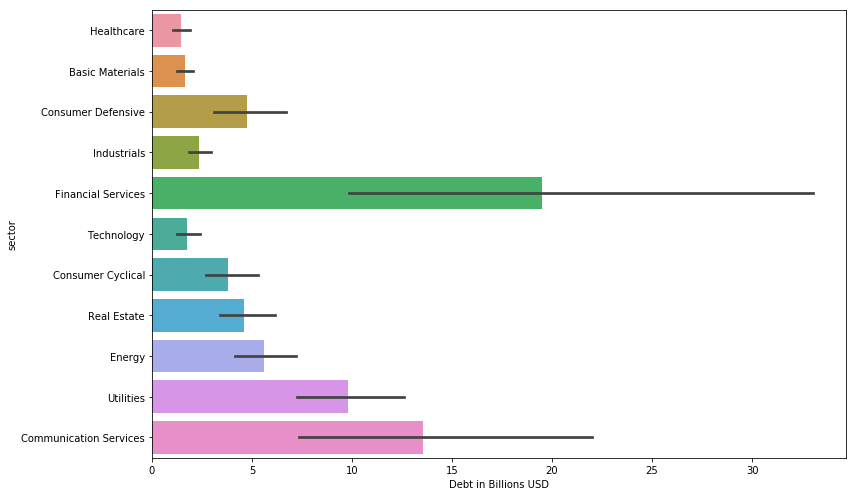

In [247]:
plt.subplots(figsize=(12,7))
sns.barplot(x='Debt in Billions USD', y='sector', data=debt_df);
plt.tight_layout()
plt.savefig('debt_sector', dpi=150)

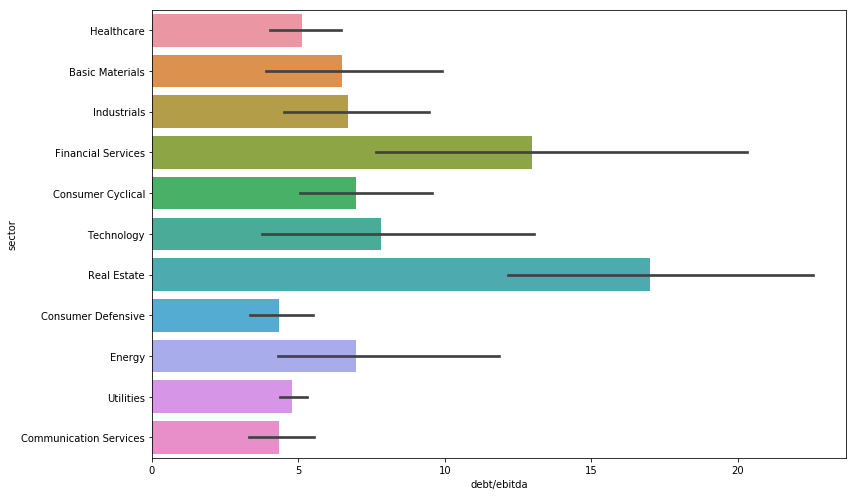

In [248]:
plt.subplots(figsize=(12,7))
sns.barplot(x='debt/ebitda', y='sector', data=debt_df[debt_df['ebitdausd']>0]);
plt.tight_layout()
plt.savefig('debt_ebitda_sector', dpi=150)

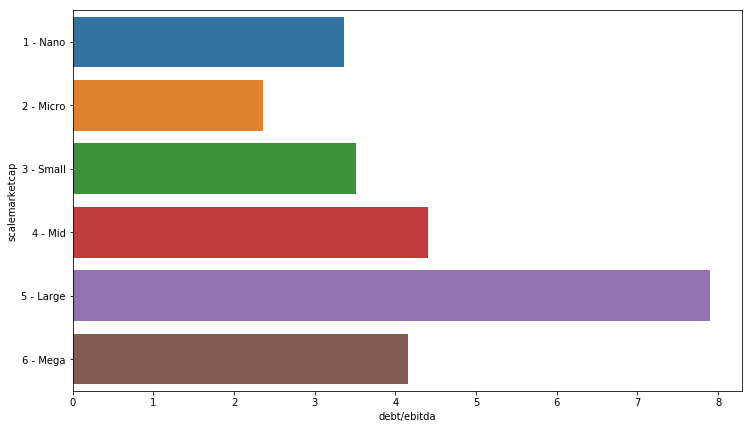

In [232]:
plt.subplots(figsize=(12,7))
bar_data = debt_df.groupby(by='scalemarketcap').mean().sort_values(by='debtusd').reset_index()
sns.barplot(x='debt/ebitda', y='scalemarketcap', data=bar_data);

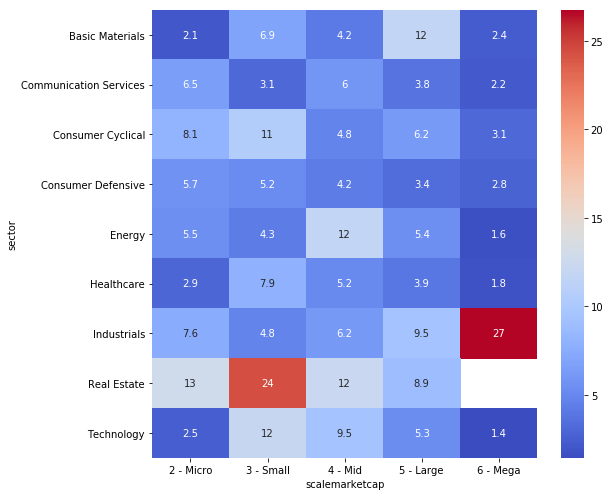

In [269]:
heat_data = pd.pivot_table(debt_df[(debt_df['ebitdausd']>0) & 
                                   (debt_df['sector']!='Financial Services') &
                                   (debt_df['scalemarketcap']!='1 - Nano') & 
                                   (debt_df['sector']!='Utilities')], 
                           values='debt/ebitda', index='sector', 
                           columns='scalemarketcap', aggfunc='mean')
plt.subplots(figsize=(9,7))
sns.heatmap(heat_data, cmap='coolwarm', annot=True);
plt.tight_layout()
plt.savefig('debt_ebitda_sector_size', dpi=150)

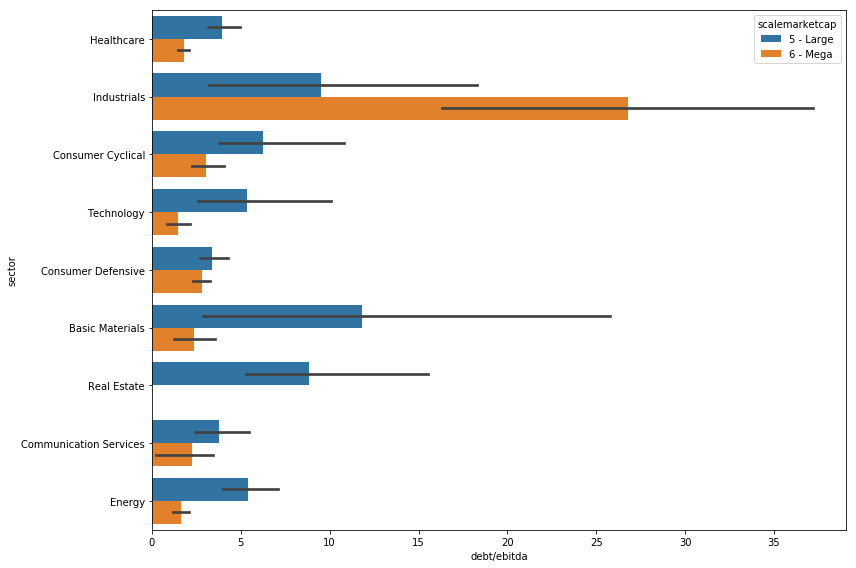

In [270]:
large_mega_df = debt_df[(debt_df['ebitdausd']>0) & 
                        (debt_df['sector']!='Financial Services') &
                        ((debt_df['scalemarketcap']=='5 - Large') | 
                         (debt_df['scalemarketcap']=='6 - Mega')) &
                        (debt_df['sector']!='Utilities')]

plt.subplots(figsize=(12,8))
sns.barplot(x='debt/ebitda', y='sector', hue='scalemarketcap', data=large_mega_df);
plt.tight_layout()
plt.savefig('debt_ebitda_sector_size_bar', dpi=150)

In [345]:
debt_df_2 = clean_table[clean_table['year'].isin([2015,2016,2017,2018,2019])][['ticker','year','debtusd',
                                                  'ebitdausd','interestusd',
                                                  'debt/ebitda','interest/ebitda',
                                                  'cashnequsd','equityusd']]
debt_df_2['uncovered_debt'] = debt_df_2['debtusd'] - 2*debt_df_2['ebitdausd']
debt_df_2['uncovered_debt'] = debt_df_2['uncovered_debt'].apply(lambda x: max(x,0))
debt_df_2['Debt in Billions USD'] = debt_df_2['debtusd']/1000000000
debt_df_2['Uncovered Debt in Billions USD'] = debt_df_2['uncovered_debt']/1000000000
debt_df_2['debt/equity'] = debt_df_2['debtusd']/debt_df_2['equityusd']

In [346]:
debt_df_2 = debt_df_2.merge(tickers[tickers['table']=='SF1'][['ticker','name','sector',
                                                              'industry','scalemarketcap']],
                            how='left', left_on='ticker', right_on='ticker')

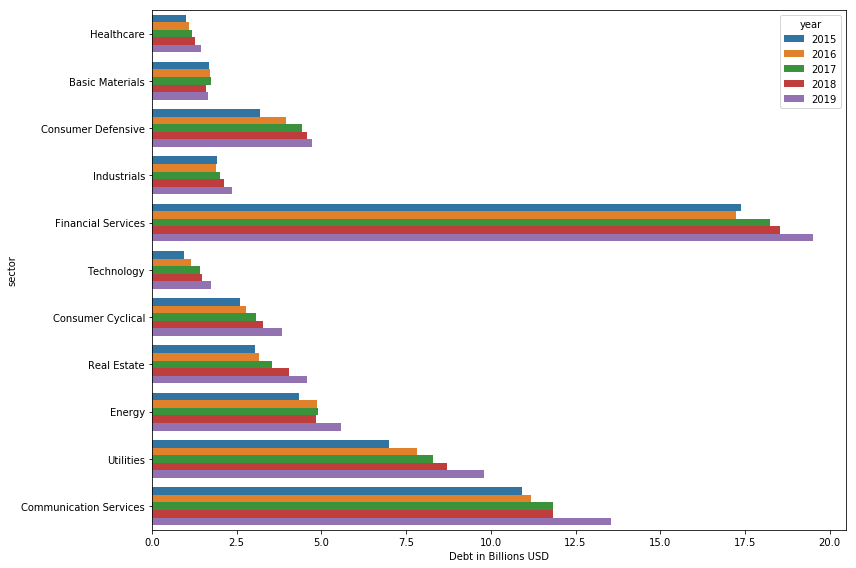

In [352]:
plt.subplots(figsize=(12,8))
sns.barplot(x='Debt in Billions USD', y='sector', hue='year', ci=None,
            data=debt_df_2);#[(debt_df_2['sector']!='Financial Services') & 
                            # (debt_df_2['sector']!='Real Estate')]);
plt.tight_layout()
plt.savefig('debt_ebitda_sector_chg', dpi=150)

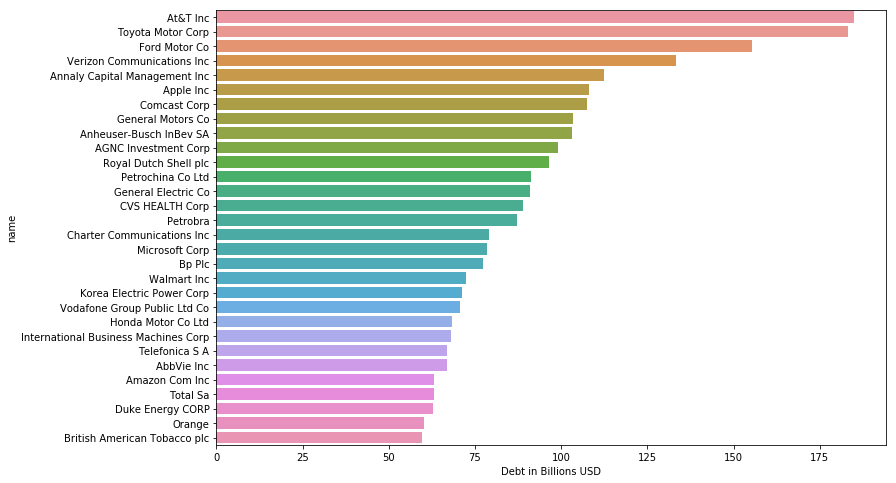

In [273]:
top_debtors = debt_df[debt_df['sector']!='Financial Services'].sort_values(by='debtusd', ascending=False).head(30)
plt.subplots(figsize=(12,8))
sns.barplot(x='Debt in Billions USD', y='name', data=top_debtors);

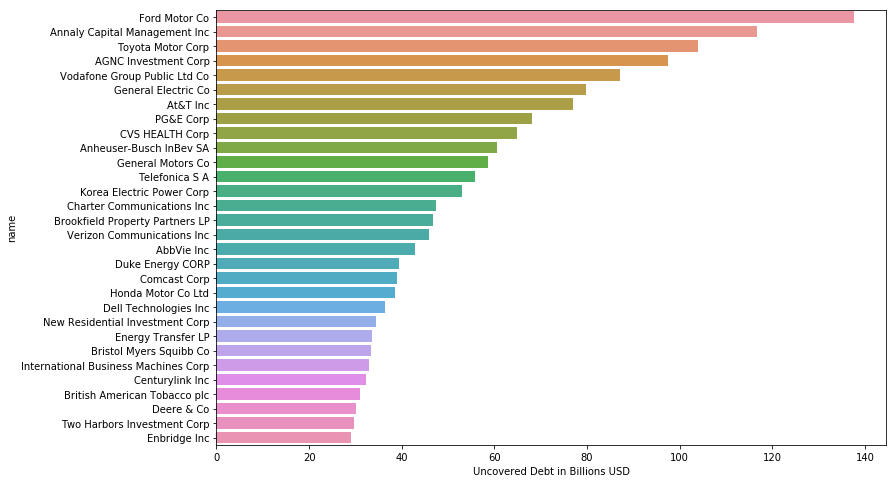

In [236]:
top_debtors_true = debt_df[debt_df['sector']!='Financial Services'].sort_values(by='uncovered_debt', 
                                                                                ascending=False).head(30)
plt.subplots(figsize=(12,8))
sns.barplot(x='Uncovered Debt in Billions USD', y='name', data=top_debtors_true);

In [237]:
top_debtors_true = debt_df[debt_df['sector']!='Financial Services'].sort_values(by='uncovered_debt', 
                                                                                ascending=False).head(70)
top_debtors_true['uncovered_debt'].sum()/debt_df['uncovered_debt'].sum()

0.1425513861035355

In [238]:
70/debt_df.shape[0]

0.01611047180667434

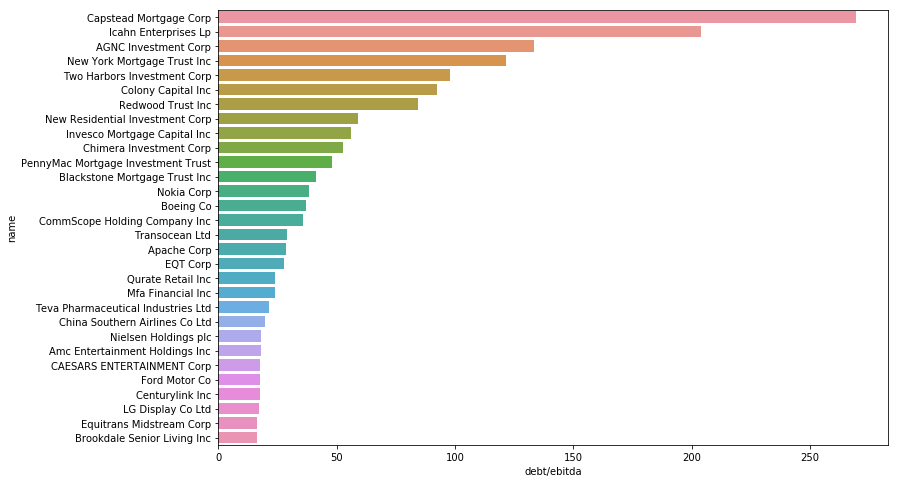

In [239]:
top_debtors_ratio = debt_df[(debt_df['sector']!='Financial Services') &
                            (debt_df['debtusd']>5000000000)].sort_values(by='debt/ebitda', 
                                                                         ascending=False).head(30)
plt.subplots(figsize=(12,8))
sns.barplot(x='debt/ebitda', y='name', data=top_debtors_ratio);

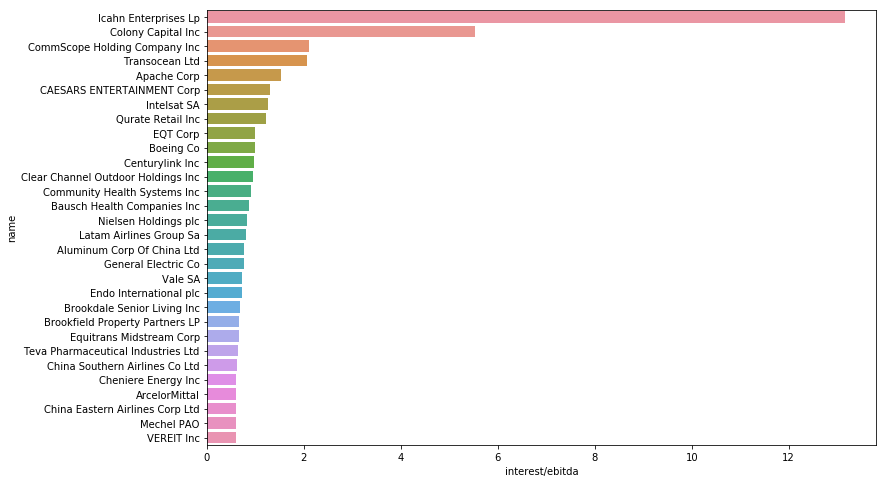

In [240]:
top_debtors_ratio = debt_df[(debt_df['sector']!='Financial Services') &
                            (debt_df['debtusd']>5000000000)].sort_values(by='interest/ebitda', 
                                                                         ascending=False).head(30)
plt.subplots(figsize=(12,8))
sns.barplot(x='interest/ebitda', y='name', data=top_debtors_ratio);

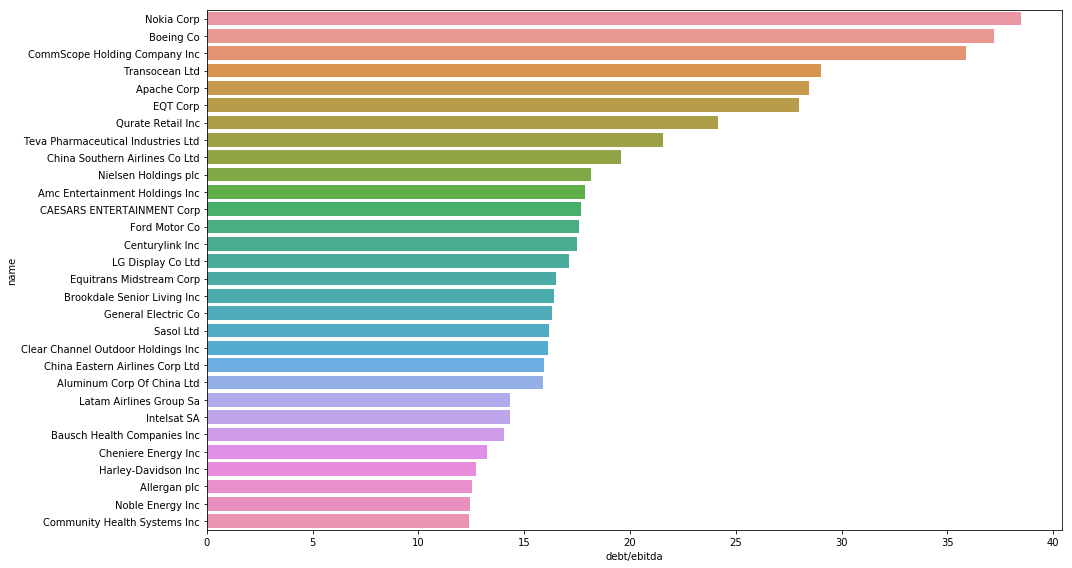

In [289]:
top_debtors_ratio = debt_df[(debt_df['sector']!='Financial Services') &
                            (debt_df['sector']!='Real Estate') &
                            (debt_df['name']!='Icahn Enterprises Lp') &
                            (debt_df['debtusd']>5000000000)].sort_values(by='debt/ebitda', 
                                                                         ascending=False).head(30)
plt.subplots(figsize=(15,8))
sns.barplot(x='debt/ebitda', y='name', data=top_debtors_ratio);
plt.tight_layout()
plt.savefig('most_indebted', dpi=150)

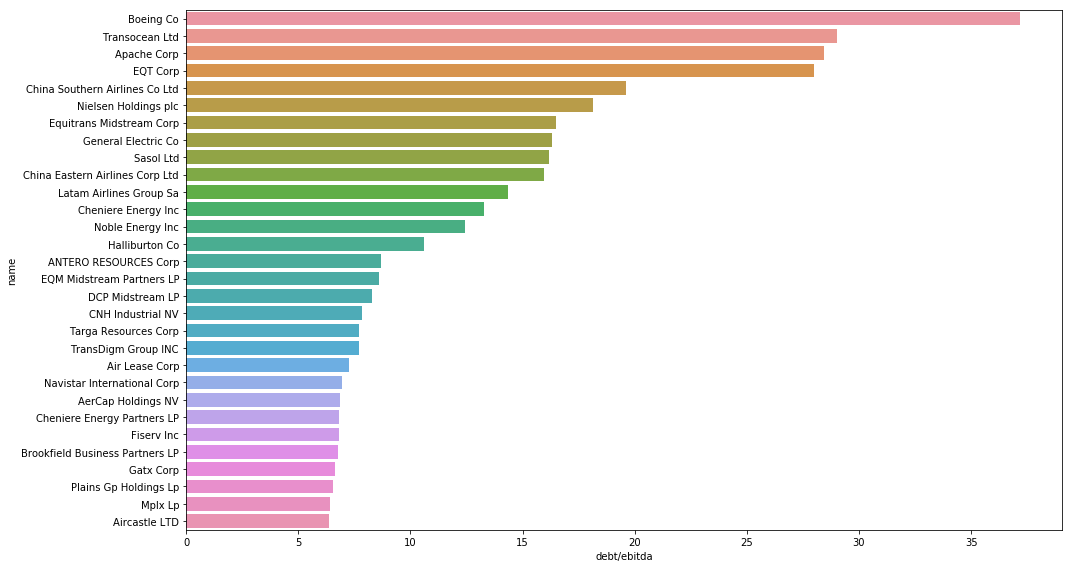

In [286]:
top_debtors_ratio = debt_df[((debt_df['sector']=='Industrials') | 
                             #(debt_df['sector']=='Real Estate') |
                             (debt_df['sector']=='Energy')) &
                            (debt_df['name']!='Icahn Enterprises Lp') &
                            (debt_df['debtusd']>5000000000)].sort_values(by='debt/ebitda', 
                                                                         ascending=False).head(30)
plt.subplots(figsize=(15,8))
sns.barplot(x='debt/ebitda', y='name', data=top_debtors_ratio);
plt.tight_layout()
plt.savefig('most_indebted', dpi=150)

In [241]:
debt_df[debt_df['ticker']=='BA']

,ticker,calendardate,debtusd,ebitdausd,interestusd,debt/ebitda,interest/ebitda,cashnequsd,uncovered_debt,Debt in Billions USD,Uncovered Debt in Billions USD,name,sector,industry,scalemarketcap
429,BA,2019-12-31,2.730200e+10,734000000.0,722000000.0,37.196185,0.983651,9.485000e+09,2.583400e+10,27.302,25.834,Boeing Co,Industrials,Aerospace & Defense,6 - Mega


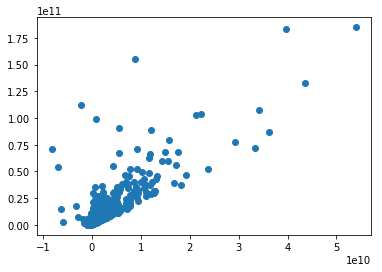

In [243]:
top_debtors_true = debt_df[debt_df['sector']!='Financial Services'].sort_values(by='uncovered_debt', 
                                                                                ascending=False).head(1000)
plt.scatter(x=top_debtors_true['ebitdausd'], y=top_debtors_true['debtusd']);